In [1]:
# IMPORTS

import pandas as pd

import matplotlib.pyplot as plt
from highlight_text import ax_text, fig_text
from pyfonts import load_google_font

import warnings
warnings.filterwarnings("ignore")

In [2]:
# DATA

data_path = r"..\data\hpi_melted.csv"
data = pd.read_csv(data_path)

In [3]:
# Create a copy of the data to avoid accidental modifications to original data
df= data.copy()

# Make a quarterly period and convert to datetime object
df["Period"] = pd.PeriodIndex(year=df["Y"], quarter=df["Quarter_Num"], freq="Q")
df["time"] = df["Period"].dt.to_timestamp()



In [4]:
# Cities to plot
cities_plot = ['Bangalore', 'Chennai', 'Delhi', 'Jaipur', 'Kanpur', 'Kochi',
       'Kolkata', 'Lucknow', 'Mumbai']

In [5]:
# FONT, COLORS AND PLOT STYILINGS

# Colors
city_colors = {
    'Bangalore':"#2E8B57",
    'Chennai':"#DAA520",
    'Delhi':"#B22222",
    'Jaipur':"#E45A92",
    'Kanpur':"#6E4B3A",
    'Kochi':"#008080",
    'Kolkata':"#4169E1",
    'Lucknow':"#C68682",
    'Mumbai':"#FF8C00"
}

misc_colors = {
    "bg_dark":"#021526",
    "bg_light":"#F5F5F5",
    "font_dark":"#F5F5F5",
    "font_light":"#37353E"

}

# Plot styling
alpha_city = 1
width_city = 2.2
alpha_other = 0.35
width_other = 1.15

# Fonts
rb_condensed_b = load_google_font("Roboto Condensed", weight=500)
rb_condensed_b_light = load_google_font("Roboto Condensed", weight=300)

In [13]:
# TITLE & SUB-TITLE

title = "One Nation, One Market, Many Stories"
# sub_title = "2010–2024: House prices rose in Chennai, Bengaluru, and Lucknow,\nwhile Mumbai and Delhi showed weaker, flatter growth."
sub_title = "2010–2024: House prices surged in Lucknow and Bengaluru,\nwhile Delhi and Mumbai saw flatter growth in recent years.\nJaipur and Kanpur experienced the slowest and most subdued rise."
credits = "Data: Housing Price Index (Base Year: 2010-11 = 100) by Reserve Bank of India"

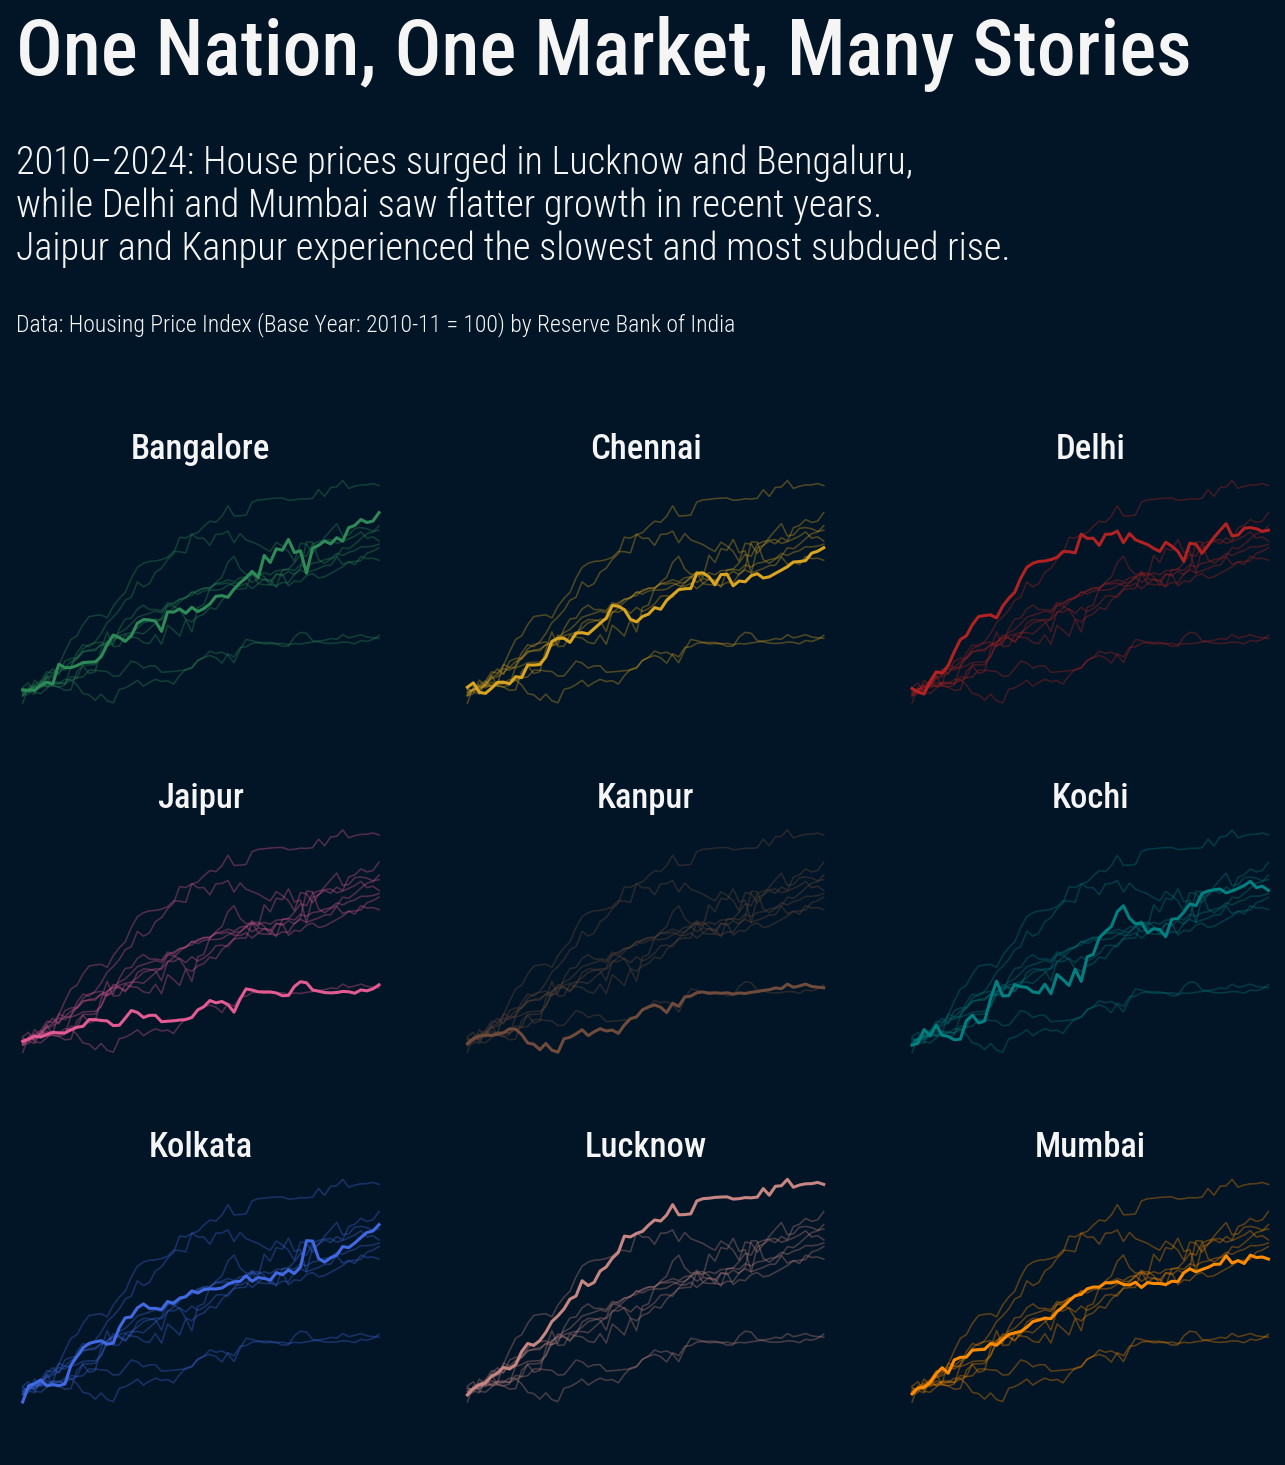

In [17]:
# PLOTTING

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

fig.subplots_adjust(left=0.15, right=0.85, top=0.7, bottom=0.15)

dark = True # change to False for light mode

if dark:
    bg_color = misc_colors["bg_dark"]
    font_color = misc_colors["font_dark"]
else:
    bg_color = misc_colors["bg_light"]
    font_color = misc_colors["font_light"]

fig.set_facecolor(bg_color)

# Title and Subtitle

fig_text(s=title, x=0.15, y=0.95, ha="left",
         size=56, font=rb_condensed_b, color=font_color)

fig_text(s=sub_title, x=0.15, y=.8785, ha="left",
         size=27.5, font=rb_condensed_b_light, color=font_color)

fig_text(s=credits, x=0.15, y=.785, ha="left",
         size=17, font=rb_condensed_b_light, color=font_color)

# Clean up canvas

for a in ax.flatten():
    a.spines[["top", "right", "left", "bottom"]].set_visible(False)
    # a.spines[["top", "right"]].set_visible(False)
    a.tick_params(left=False, bottom=False)
    # a.tick_params(left=True, bottom=True)
    a.set_xticklabels([])
    a.set_yticklabels([])
    # a.grid(linestyle=":", color="grey")
    a.grid(False)
    a.set_xlabel("")
    a.set_ylabel("")
    a.margins(y=0.1)
    a.margins(x=0.02)
    a.set_facecolor(bg_color)

# Plot each city in each subplot

for i, (city, ax) in enumerate(zip(cities_plot, ax.flatten())):
    city_df = df[df["City"]==city]
    others_df = df[df["City"]!=city]

    other_cities = others_df["City"].unique()

    for other_city in other_cities:
        other_hpi = others_df[others_df["City"]==other_city]["HPI"]
        other_time = others_df[others_df["City"]==other_city]["time"]

        ax.plot(other_time, other_hpi, color=city_colors[city], alpha=alpha_other, linewidth=width_other)
        ax.set_ylim(-5,450)
    
    city_hpi = city_df["HPI"]
    city_time = city_df["time"]
    ax.plot(city_time, city_hpi, color=city_colors[city], alpha=alpha_city, linewidth=width_city)
    ax.set_ylim(-5,450)

    ax.set_title(city, font=rb_condensed_b, size=25, pad=2, color=font_color)

# Save the figure

file_save_path = r"..\viz\housing.jpeg"
dpi = 300
plt.savefig(file_save_path, dpi=dpi, bbox_inches="tight", pad_inches=2)

---